In [236]:
import pandas as pd 
import numpy as np 
import seaborn as sns 

In [237]:
df=pd.read_csv(r"C:\Users\utilisateur\Desktop\Data science\PROJECTS\Loan-Approval-Prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [238]:
df.drop_duplicates(inplace=True)

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [240]:
df['Dependents']=pd.to_numeric(df['Dependents'],errors='coerce')


In [241]:
df['Dependents'].dtypes

dtype('float64')

In [242]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [243]:
df.drop_duplicates()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,NaN,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [244]:
null=(df.isnull().sum()/df.shape[0]*100).round(2)
print(null)

Loan_ID               0.00
Gender                2.12
Married               0.49
Dependents           10.75
Education             0.00
Self_Employed         5.21
ApplicantIncome       0.00
CoapplicantIncome     0.00
LoanAmount            3.58
Loan_Amount_Term      2.28
Credit_History        8.14
Property_Area         0.00
Loan_Status           0.00
dtype: float64


In [245]:
null.sum()

32.57

In [246]:
for x in df.columns:
    if df[x].dtype == 'object':
        df[x] = df[x].fillna(df[x].mode()[0])
    else:
        df[x] = df[x].fillna(df[x].mean())


In [247]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [248]:
df['Dependents']=df['Dependents'].astype(int)

In [249]:
for x in df.columns:
    if df[x].dtype =='object' and x !='Loan_ID':
        print(df[x].value_counts())
        print('-'*40)


Gender
Male      502
Female    112
Name: count, dtype: int64
----------------------------------------
Married
Yes    401
No     213
Name: count, dtype: int64
----------------------------------------
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
----------------------------------------
Self_Employed
No     532
Yes     82
Name: count, dtype: int64
----------------------------------------
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
----------------------------------------
Loan_Status
Y    422
N    192
Name: count, dtype: int64
----------------------------------------


<Axes: ylabel='count'>

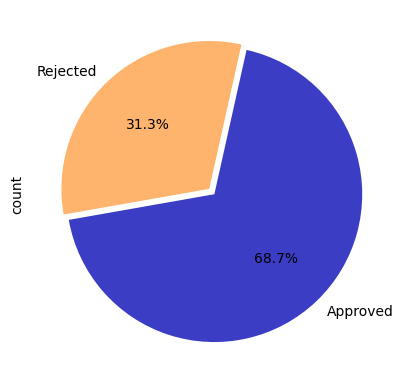

In [250]:
#pie chart 
explode=(0.0001,0.05)
colors=['#3b3dc4','#ffb46e']
plot=df['Loan_Status'].replace({'Y':'Approved','N':'Rejected'})
plot.value_counts().plot(kind='pie',explode=explode,autopct='%0.1f%%',startangle=190,colors=colors)

In [251]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [252]:
import matplotlib.pyplot as plt 
import seaborn as sns 

Gender       Female  Male
Loan_Status              
N                37   155
Y                75   347


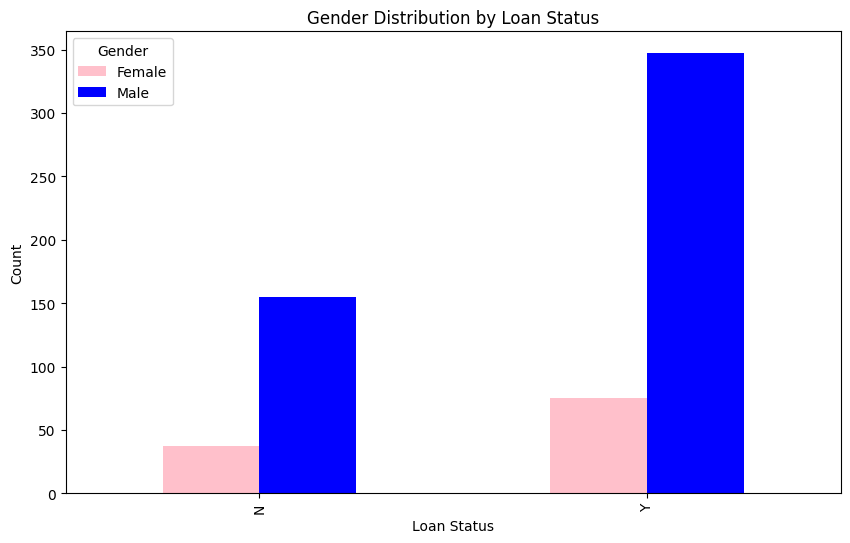

In [253]:
gender_counts = df.groupby('Loan_Status')['Gender'].value_counts().unstack()
print(gender_counts)

# Plot
gender_counts.plot(kind='bar', figsize=(10, 6), stacked=False, color=['pink','blue'])
plt.title('Gender Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

In [254]:
df['LoanAmount']=df['LoanAmount'].round(2)
df.iloc[:,1::].head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.41,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.00,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.00,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.00,360.0,1.0,Urban,Y


In [255]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype(int)

In [256]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [257]:
import plotly.express as px
fig = px.bar(df, x="Loan_Status", y="LoanAmount", color="Self_Employed", barmode="group",color_discrete_sequence=["#FF2002", "#1F0FF0"])
fig.update_layout(title={'text':'Loan Amount by Loan Status and Employment','x':0.5},bargap=0.1)
fig.show()

In [258]:
fig=px.histogram(df,x="LoanAmount",nbins=20,color='Loan_Status')
fig.update_layout(title={'text':'Loan Amount Distribution','x':0.5})


In [259]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.41,360,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00,360,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00,360,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00,360,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00,360,1.0,Urban,Y


In [260]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [261]:
fig = px.bar(df, x="Gender", y="ApplicantIncome", color="Loan_Status", barmode="group", 
             facet_row="Education", facet_col="Married",color_discrete_map={"Y": "whitesmoke", "N": "violet"})
fig.show()

In [262]:
print(df.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term       int32
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


<Axes: >

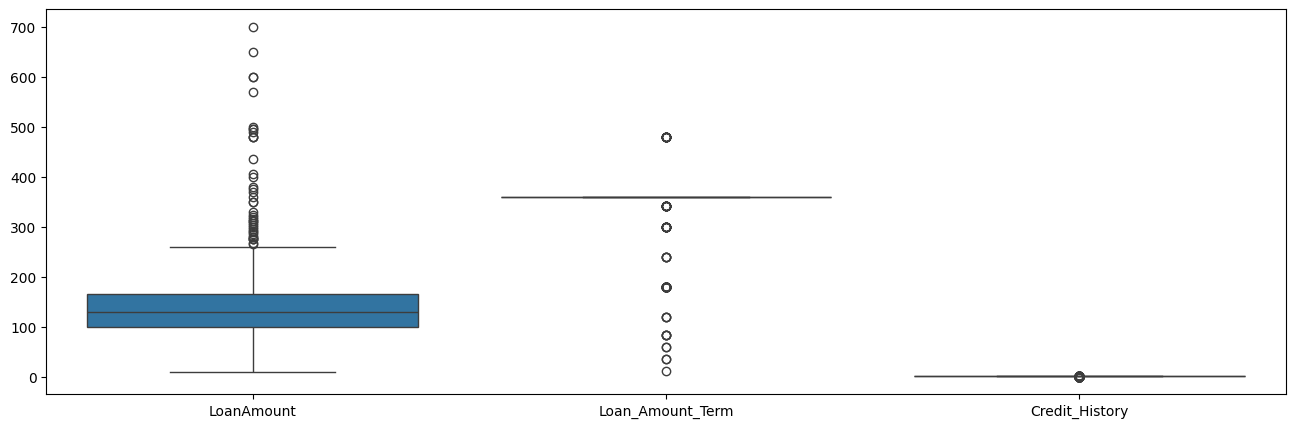

In [263]:
plt.figure(figsize=(16,5))
sns.boxplot(df[['LoanAmount','Loan_Amount_Term','Credit_History']])


In [264]:
df['Loan_Amount_Term'].max(),df['Loan_Amount_Term'].min()

(480, 12)

In [265]:
only_numeric=df.select_dtypes(
    include=['float','int']).columns

figx=px.box(df,y=only_numeric,width=900,height=400,color_discrete_sequence=['red'])
figx.show()


In [266]:
figx=px.violin(df,y='ApplicantIncome',width=1000,height=400,color_discrete_sequence=['red'])
figx.show()

In [267]:
from scipy.stats import zscore


In [268]:
df['zscore_applicant income']=zscore(df['ApplicantIncome'])
df['zscore_applicant income']

0      0.072991
1     -0.134412
2     -0.393747
3     -0.462062
4      0.097728
         ...   
609   -0.410130
610   -0.212557
611    0.437174
612    0.357064
613   -0.134412
Name: zscore_applicant income, Length: 614, dtype: float64

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   Gender                   614 non-null    object 
 2   Married                  614 non-null    object 
 3   Dependents               614 non-null    int32  
 4   Education                614 non-null    object 
 5   Self_Employed            614 non-null    object 
 6   ApplicantIncome          614 non-null    int64  
 7   CoapplicantIncome        614 non-null    float64
 8   LoanAmount               614 non-null    float64
 9   Loan_Amount_Term         614 non-null    int32  
 10  Credit_History           614 non-null    float64
 11  Property_Area            614 non-null    object 
 12  Loan_Status              614 non-null    object 
 13  zscore_applicant income  614 non-null    float64
dtypes: float64(4), int32(2), i

In [270]:
threshold=3
df_clean=df[df['zscore_applicant income'].abs()<threshold]


In [271]:
df_clean=df_clean.drop('zscore_applicant income',axis=1)

In [281]:
print('-'*40,'\n',df_clean.columns,'-'*40,df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   Gender                   614 non-null    object 
 2   Married                  614 non-null    object 
 3   Dependents               614 non-null    int32  
 4   Education                614 non-null    object 
 5   Self_Employed            614 non-null    object 
 6   ApplicantIncome          614 non-null    int64  
 7   CoapplicantIncome        614 non-null    float64
 8   LoanAmount               614 non-null    float64
 9   Loan_Amount_Term         614 non-null    int32  
 10  Credit_History           614 non-null    float64
 11  Property_Area            614 non-null    object 
 12  Loan_Status              614 non-null    object 
 13  zscore_applicant income  614 non-null    float64
dtypes: float64(4), int32(2), i